<a href="https://colab.research.google.com/github/kevincoakley/DT8807/blob/main/adaline_bgd_sgd_mbgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaptive linear neuron (Adaline) - gradient descent - exmple - Ibrahim 22.08.2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sns
import time

In [2]:
# Load IRIS data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


In [3]:
# extract first 100 class labels (50 iris-setosa and 50 iris-versicolor)
x_orig = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100,4].values
y =np.where(y=='Iris-setosa',1, -1)

x = (x_orig - x_orig.mean(axis=0)) / x_orig.std(axis=0)

print(y)
print(len(x))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
100


In [4]:
class adaline(object):
  def __init__(self, epochs=100, eta=0.1):
    self.epochs = epochs
    self.eta = eta

  def train(self, training_inputs, training_labels, training_mode="BGD", batch_size=20):
    x = training_inputs
    t = training_labels
    self.cost = []   # to plot cost function over epochs
    # Fixed weight array for 3+ features
    self.w = random.rand(1 + training_inputs.shape[1])

    start_time = time.time()

    for i in range(self.epochs):
      #
      # Batch Gradient Descent 
      #
      if training_mode == "BGD":
        net = np.dot(x, self.w[1:])+self.w[0]
        y = net  #linear activation function
        error = (t - y)   # this is vector
        #update weights using sum of gradients
        self.w[1:] += self.eta * (np.dot(error, x)).mean()
        self.w[0] += self.eta * error.mean()
        cost = 0.5 * (error**2).sum()
        self.cost.append(cost)
      #
      # Stocastic Gradient Descent
      #
      elif training_mode == "SGD":
        cost = 0
        for index in range(len(x)):
          net = np.dot(x[index,:], self.w[1:]) + self.w[0]
          y = net  #linear activation function
          error = (t[index] - y) # this is vector
          #update the weights using SGD
          self.w[1:] += self.eta * np.dot(error, x[index,:])
          self.w[0] += self.eta * error
          cost += error**2
        self.cost.append(cost/len(x))
      #
      # Mini-batch Gradient Descent 
      #
      elif training_mode == "MBGD":
        cost = 0
        for index in range(0, len(x), batch_size):
          x_mini = x[index:index+batch_size,:]
          t_mini = t[index:index+batch_size]

          net = np.dot(x_mini, self.w[1:]) + self.w[0]
          y = net  #linear activation function
          error = (t_mini - y)   # this is vector
          #update weights using sum of gradients
          self.w[1:] += self.eta * (np.dot(error, x_mini)).mean()
          self.w[0] += self.eta * error.mean()
          cost += 0.5 * (error**2).sum()
        self.cost.append(cost/(len(x_mini)/batch_size))
    
    end_time = time.time()
    print("Execution time: ", end_time - start_time, "seconds")

    return self
  
  def predict(self, inputs):
    net=np.dot(inputs, self.w[1:])+self.w[0]
    return(np.where(net>=0, 1, -1)) 

In [5]:
def plot_training_error(model, predictions):
  #print(model.cost)
  #print(model.w)
  #print(predictions)

  plt.plot(range(1,len(model.cost)+1), model.cost, marker='o')
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.title('Training Error')
  plt.grid()
  plt.show()

In [6]:
def plot_predictions(x, model, predictions):
  # scatter plot of predictions
  plt.scatter(x[predictions==1,0], x[predictions==1,1], color='red', marker='o', label='setosa')
  plt.scatter(x[predictions==-1,0], x[predictions==-1,1], color='blue', marker='x', label='versicolor')
  # decsion line
  xx1 = np.arange(x[:,0].min()-2, x[:,0].max()+2, 0.1)
  xx2 = -model.w[1]/model.w[2] * xx1 - model.w[0]/model.w[2]
  plt.plot(xx1, xx2, 'g--')
  plt.xlabel('Sepal length [cm]')
  plt.ylabel('Petal length [cm]')
  plt.legend(loc='upper left')
  plt.grid()
  plt.show()

In [7]:
def plot_3d_predictions(x, model, predictions):  
  ax = plt.figure(figsize = (10, 10)).add_subplot(projection='3d')
  ax.view_init(30, 15)

  # Creating plot
  ax.scatter3D(xxx[predictions==1,0], xxx[predictions==1,1], xxx[predictions==1,2], color = "red", marker='o')
  ax.scatter3D(xxx[predictions==-1,0], xxx[predictions==-1,1], xxx[predictions==-1,2], color = "blue", marker='x')
 
  # decsion line
  tmp = np.linspace(-2,2,2)
  xx1,yy1 = np.meshgrid(tmp,tmp)
  #zz1 = -model.w[1]/model.w[3] * xx1 - model.w[2]/model.w[3] * yy1 - model.w[0]/model.w[3] 
  zz1 = (-model.w[0] - model.w[1] * xx1 - model.w[2] * yy1 ) / model.w[3] # Same as above

  ax.plot_surface(xx1, yy1, zz1, color='gray', alpha=.8)

  

  ax.set_xlabel('Sepal length [cm]')
  ax.set_ylabel('Sepal width [cm]')
  ax.set_zlabel('Petal length [cm]')

  #plt.legend(loc='upper left')
  plt.grid()
  plt.show()

In [8]:
def calculate_error(predictions, y, verbose=False):
  error = 0

  if verbose:
    print("predictions:")
    print(predictions)
    print("correct values:")
    print(y)

  for index, pred in enumerate(predictions):
    if pred != y[index]:
      error += 1

  print("error: ", error/len(y))

Execution time:  0.0036535263061523438 seconds


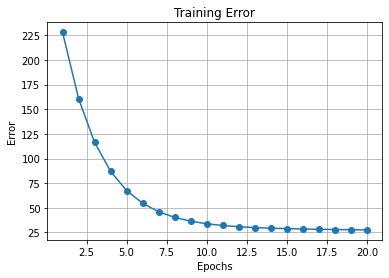

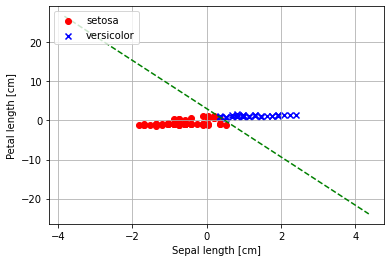

error:  0.17


In [9]:
# BGD
model = adaline(epochs=20, eta=0.01)

model.train(x, y, "BGD")
predictions = model.predict(x)

plot_training_error(model, predictions)
plot_predictions(x, model, predictions)

calculate_error(predictions, y)

Execution time:  0.024289846420288086 seconds


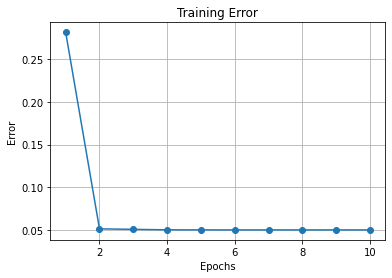

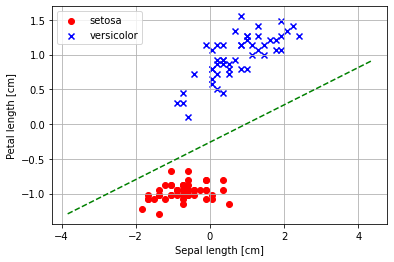

error:  0.0


In [10]:
# for SGD
model=adaline(epochs=10, eta=0.1)

model.train(x, y, "SGD")
predictions = model.predict(x)

plot_training_error(model, predictions)
plot_predictions(x, model, predictions)

calculate_error(predictions, y)

Execution time:  0.016665220260620117 seconds


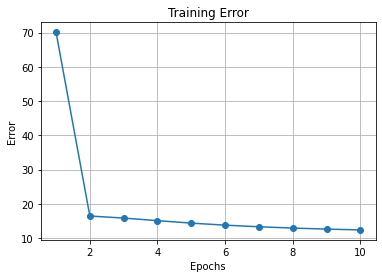

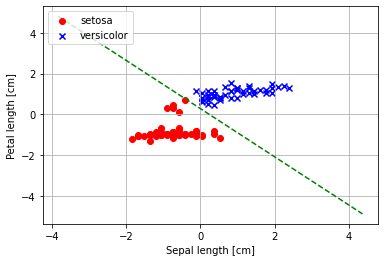

error:  0.05


In [11]:
# for MINI
model=adaline(epochs=10, eta=.01)

model.train(x, y, "MBGD", batch_size=10)
predictions = model.predict(x)

plot_training_error(model, predictions)
plot_predictions(x, model, predictions)

calculate_error(predictions, y)

In [12]:
# extract first 100 class labels (50 iris-setosa and 50 iris-versicolor)
xxx_orig = df.iloc[0:100, [0, 1, 2]].values

xxx = (xxx_orig - xxx_orig.mean(axis=0)) / xxx_orig.std(axis=0)

#print(xxx)
print(xxx.shape[1])
print(x.ndim)

3
2


Execution time:  0.0004878044128417969 seconds


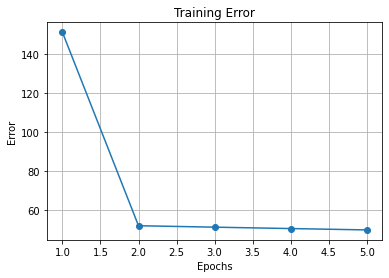

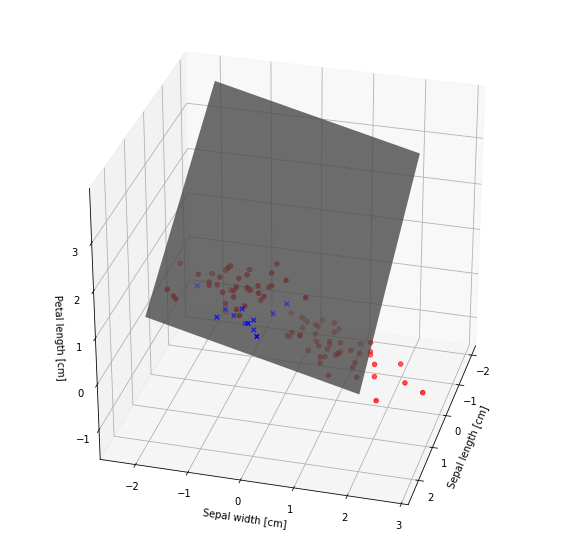

error:  0.38


In [13]:
# BGD
model = adaline(epochs=5, eta=0.01)

model.train(xxx, y, "BGD")
predictions = model.predict(xxx)

plot_training_error(model, predictions)
plot_3d_predictions(xxx, model, predictions)

calculate_error(predictions, y)

Execution time:  0.02299952507019043 seconds


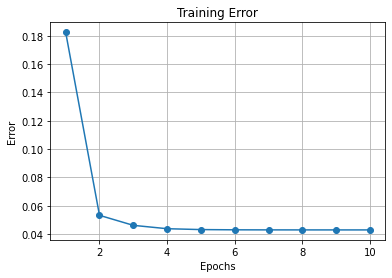

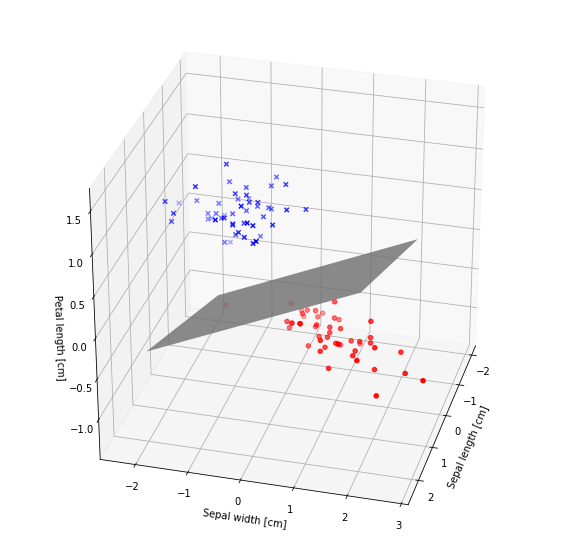

error:  0.0


In [14]:
# for SGD
model=adaline(epochs=10, eta=0.1)

model.train(xxx, y, "SGD")
predictions = model.predict(xxx)

plot_training_error(model, predictions)
plot_3d_predictions(xxx, model, predictions)

calculate_error(predictions, y)

Execution time:  0.013417959213256836 seconds


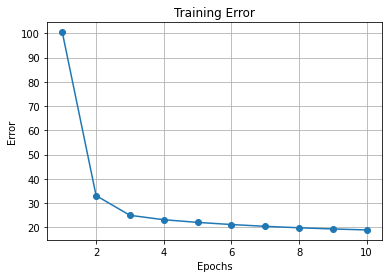

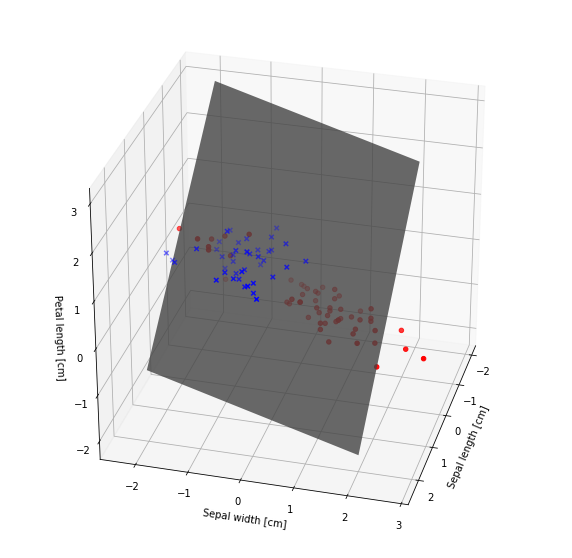

error:  0.08


In [15]:
# for MINI
model=adaline(epochs=10, eta=.01)

model.train(xxx, y, "MBGD", batch_size=10)
predictions = model.predict(xxx)

plot_training_error(model, predictions)
plot_3d_predictions(xxx, model, predictions)

calculate_error(predictions, y)